In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Index

1. Exploratory Data Analysis

- 1.1 Data intepretation (I)

- 1.2 Data intepretation (II)

- 1.3 Data processing

> 1.3.1 Missing values amount

> 1.3.2 Missing values distribution

> 1.3.3 Handling missing values in categorical features

> 1.3.3.1 Labelling missing values

> 1.3.3.2 One-Hot Encoding the categorical features

> 1.3.4 Handling missing values in numerical features

> 1.3.4.1 Median imputation

> 1.3.5 Dataset before (df) and after (df2) modifications comparation - Numerical features

> 1.3.6 Handling missing values in numerical features (II)

> 1.3.6.1 Iterative imputation

> 1.3.7 Dataset before (df) and after (df2) modifications comparation - Numerical features (II)

- 1.4 Statistics Analysis (I)

## 1. Exploratory Data Analysis

- 1.1 Data intepretation (I)

How many categorical and numerical columns we have?

In [2]:
df=pd.read_csv("Employee_Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

As we can see:
    We have 1470 entries in total and 147 with missing values (1470-1323).
    We have 9 categorical columns and 26 numerical ones. Our datatypes are float and objects.

Columns to perform the study based on are "JobSatisfaction" and "PerformanceRating"

Entries with null values

In [3]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [4]:
missing_percentage = df.isnull().mean() * 100

missing_percentage

Age                         10.0
Attrition                   10.0
BusinessTravel              10.0
DailyRate                   10.0
Department                  10.0
DistanceFromHome            10.0
Education                   10.0
EducationField              10.0
EmployeeCount               10.0
EmployeeNumber              10.0
EnvironmentSatisfaction     10.0
Gender                      10.0
HourlyRate                  10.0
JobInvolvement              10.0
JobLevel                    10.0
JobRole                     10.0
JobSatisfaction             10.0
MaritalStatus               10.0
MonthlyIncome               10.0
MonthlyRate                 10.0
NumCompaniesWorked          10.0
Over18                      10.0
OverTime                    10.0
PercentSalaryHike           10.0
PerformanceRating           10.0
RelationshipSatisfaction    10.0
StandardHours               10.0
StockOptionLevel            10.0
TotalWorkingYears           10.0
TrainingTimesLastYear       10.0
WorkLifeBa

It is evident that each column has at least 147 missing values, which accounts for 10% of the data.

In [5]:
df.isnull().sum().sum()

5145

- 1.2 Data intepretation (II)

In [6]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323,1323,1323.000000,1323,1323.000000,1323.000000,1323,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1065,890,NaN,824,NaN,NaN,504,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.635268,NaN,NaN,802.030050,NaN,9.091097,2.923447,NaN,0.999325,1026.679166,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,NaN,NaN,414.031025,NaN,8.177870,1.072203,NaN,0.099656,610.480802,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,NaN,NaN,86.828045,NaN,0.750112,0.770362,NaN,0.628985,1.054148,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,NaN,NaN,456.479553,NaN,2.147069,2.122706,NaN,0.931146,501.854842,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,NaN,NaN,782.958705,NaN,6.920808,3.015658,NaN,0.998949,1022.025017,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,NaN,NaN,1130.577949,NaN,13.584900,3.700560,NaN,1.067371,1533.811096,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964


Statisitical description of numerical columns?

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


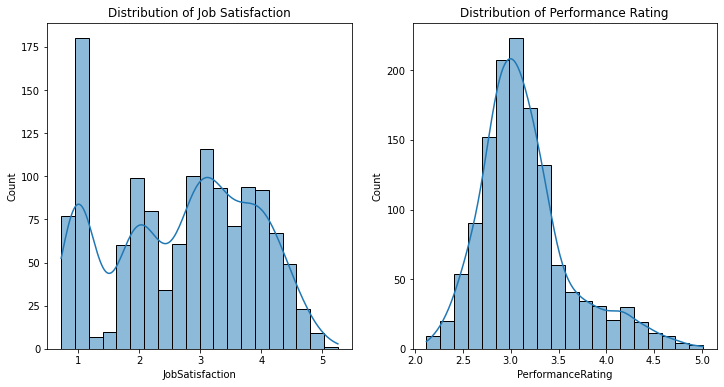

In [8]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

- The mean age is approximately 35.7 years with a standard deviation of 7.7 years, indicating a moderately diverse age range.

- The average daily rate is approximately £801.45, with a wide range (standard deviation: £428.64).

- On average, employees live 8.06 km away from work, with considerable variation in this distance (standard deviation: 8.49 km).

- The average education level is 2.7 on a scale of 1-5, indicating that most employees have at least some college education.

- The average hourly rate is £64.29 with a standard deviation of £19.5.

- The average job level is 1.85, indicating that most employees hold lower to mid-level positions.

-  Employees have an average of 9.7 years of total work experience.

-  The average length of employment at the company is 5.7 years, but this varies significantly (standard deviation: 5.03 years).

-  The range of job satisfaction levels among employees is diverse, with some being very dissatisfied and others very satisfied.

-  Performance ratings demonstrate less variability than job satisfaction, with the majority of employees clustered around the average rating.

Notice that the performance rating of employees follows a normal distribution where most of the answers are concentrated between a 2.5 and 3.5, indicating that the most common is a regular performance. However, the distribution of Job Satisfaction does not follow a normal distribution but is a wider scattered, indicating that the job satisfaction in the of employees in the company is very different amount each employee.

Statisitical description of categorical columns?

In [9]:
df.describe(include="O")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1323,1323,1323,1323,1323,1323,1323,1323,1323
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1065,890,824,504,783,281,596,1323,929


In [10]:
df['BusinessTravel'].value_counts()

Travel_Rarely        890
Travel_Frequently    279
Non-Travel           154
Name: BusinessTravel, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      783
Female    540
Name: Gender, dtype: int64

In [12]:
df['MaritalStatus'].value_counts()

Married     596
Single      429
Divorced    298
Name: MaritalStatus, dtype: int64

In [13]:
df['EducationField'].value_counts()

Life Sciences       504
Medical             397
Marketing           149
Technical Degree    141
Other                83
Human Resources      49
Name: EducationField, dtype: int64

In [14]:
df['OverTime'].value_counts()

No     929
Yes    394
Name: OverTime, dtype: int64

In [15]:
df['JobRole'].value_counts()

Sales Executive              281
Research Scientist           257
Laboratory Technician        229
Manufacturing Director       122
Healthcare Representative    118
Manager                      101
Research Director             80
Sales Representative          75
Human Resources               60
Name: JobRole, dtype: int64

In [16]:
df['Over18'].value_counts()

Y    1323
Name: Over18, dtype: int64

In [17]:
df['Attrition'].value_counts()

No     1065
Yes     258
Name: Attrition, dtype: int64

In [18]:
df['Department'].value_counts()

Research & Development    824
Sales                     393
Human Resources           106
Name: Department, dtype: int64

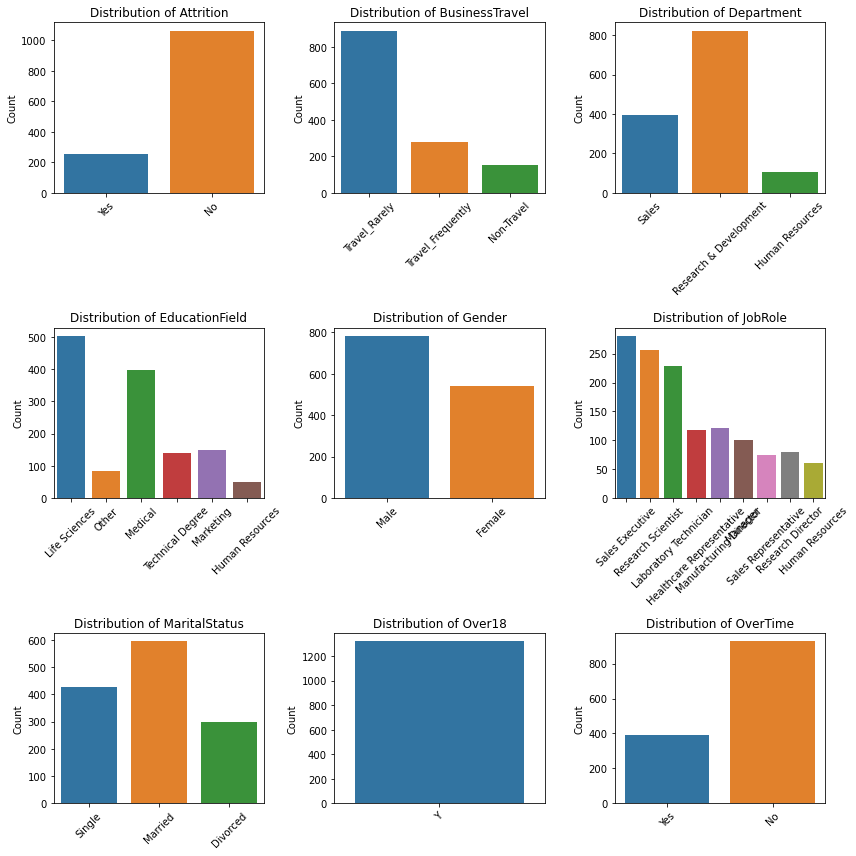

In [19]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

It is important to note that NaN values are not represented when using .value_counts() or plottingdata. Therefore, they must be labelled and processed into a numerical form for further analysis.

In [20]:
df_cat_columns = df[categorical_columns].fillna('Missing')

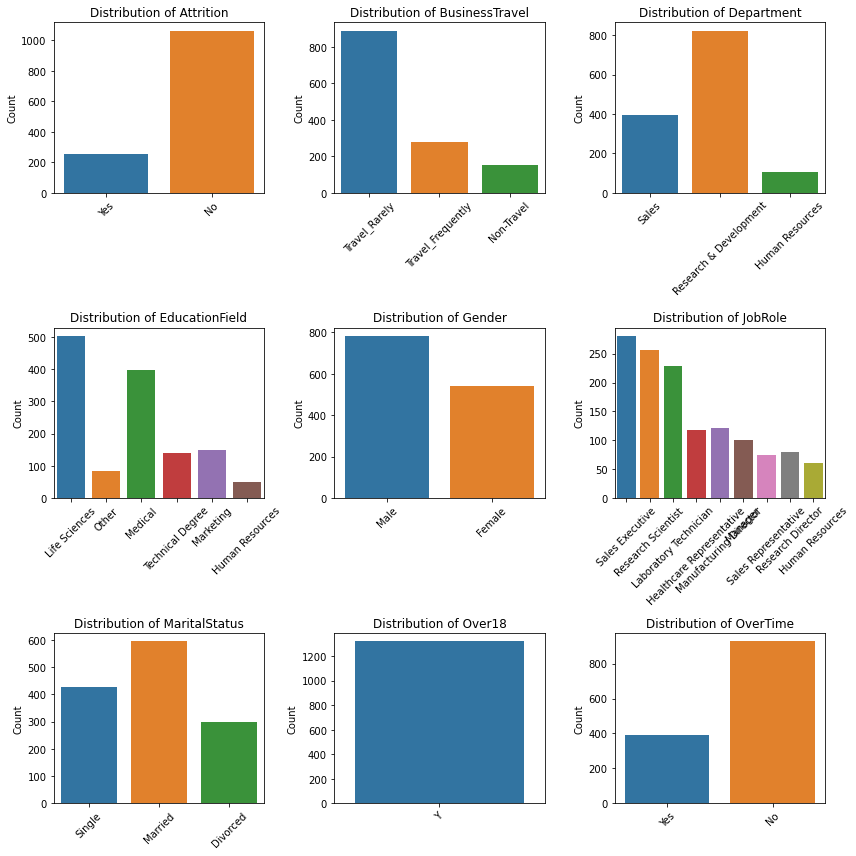

In [21]:
categorical_columns = df_cat_columns.select_dtypes(include=['object']).columns

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The profile of the average employee is the next one:

In [22]:
most_common_values = df[categorical_columns].mode().iloc[0]
most_common_values

Attrition                             No
BusinessTravel             Travel_Rarely
Department        Research & Development
EducationField             Life Sciences
Gender                              Male
JobRole                  Sales Executive
MaritalStatus                    Married
Over18                                 Y
OverTime                              No
Name: 0, dtype: object

- 1.3 Data processing

> 1.3.1 Missing values amount

The initial inquiry is whether our NaN values are in float and np.nan format or in string format as 'nan'.
Pandas only identifies np.nan as null values in numeric arrays, None or NaN in object arrays, and NaT in datatimelike. Any null value in string format is not recognised by pandas as a null value.

In [23]:
for column in df.columns:
    # Checking if there are NaN values in the column
    if df[column].isnull().any():
        # Extract the first non-null value for type comparison
        nan_value = df[column][df[column].isnull()].iloc[0]

        # Check the type of the NaN value
        if isinstance(nan_value, float) and np.isnan(nan_value):
            print(f"Column '{column}': NaN values are of type float (numpy.nan)")
        else:
            print(f"Column '{column}': NaN values are not numpy.nan")

Column 'Age': NaN values are of type float (numpy.nan)
Column 'Attrition': NaN values are of type float (numpy.nan)
Column 'BusinessTravel': NaN values are of type float (numpy.nan)
Column 'DailyRate': NaN values are of type float (numpy.nan)
Column 'Department': NaN values are of type float (numpy.nan)
Column 'DistanceFromHome': NaN values are of type float (numpy.nan)
Column 'Education': NaN values are of type float (numpy.nan)
Column 'EducationField': NaN values are of type float (numpy.nan)
Column 'EmployeeCount': NaN values are of type float (numpy.nan)
Column 'EmployeeNumber': NaN values are of type float (numpy.nan)
Column 'EnvironmentSatisfaction': NaN values are of type float (numpy.nan)
Column 'Gender': NaN values are of type float (numpy.nan)
Column 'HourlyRate': NaN values are of type float (numpy.nan)
Column 'JobInvolvement': NaN values are of type float (numpy.nan)
Column 'JobLevel': NaN values are of type float (numpy.nan)
Column 'JobRole': NaN values are of type float (

The dataset contains NaN values, which are identified correctly by the .isnull function as they are of type numpy.nan and float.

> 1.3.2 Missing values distribution

The next question to answer is whether the null values follow a pattern or are randomly distributed.

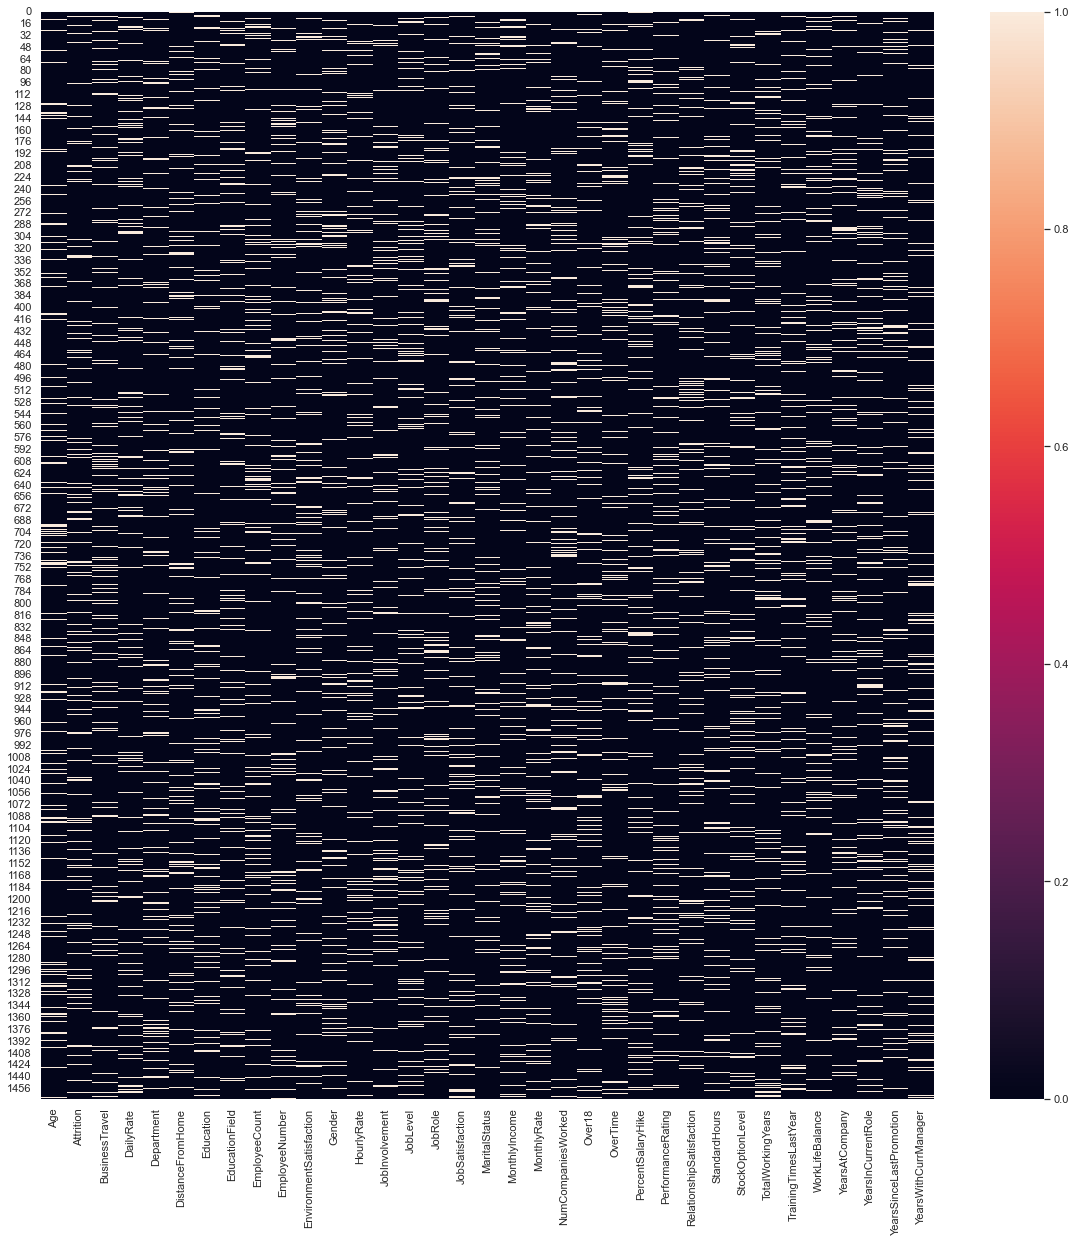

In [24]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(df.isnull())
plt.show(plot)

As we can see in the previous visualization the null values in our dataset are randomly distributed.

Once we have confirmed the amount of null values we have, and wheter or not they are randomly distributed, we have decided to perform One-Hot Encoding and labeling as a separate category the nan values presents in categorical features.

> 1.3.3 Handling missing values in categorical features

In [ ]:
> 1.3.3.1 Labelling missing values

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = df[categorical_columns].fillna('Missing')

In [ ]:
> 1.3.3.2 One-Hot Encoding the categorical features

In [25]:
df2 = pd.get_dummies(df, columns=categorical_columns)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1323 non-null   float64
 1   DailyRate                          1323 non-null   float64
 2   DistanceFromHome                   1323 non-null   float64
 3   Education                          1323 non-null   float64
 4   EmployeeCount                      1323 non-null   float64
 5   EmployeeNumber                     1323 non-null   float64
 6   EnvironmentSatisfaction            1323 non-null   float64
 7   HourlyRate                         1323 non-null   float64
 8   JobInvolvement                     1323 non-null   float64
 9   JobLevel                           1323 non-null   float64
 10  JobSatisfaction                    1323 non-null   float64
 11  MonthlyIncome                      1323 non-null   float

> 1.3.4 Handling missing values in numerical features

In [27]:
missing_percentage = df.select_dtypes(include=['float64']).isnull().mean() * 100

missing_percentage

Age                         10.0
DailyRate                   10.0
DistanceFromHome            10.0
Education                   10.0
EmployeeCount               10.0
EmployeeNumber              10.0
EnvironmentSatisfaction     10.0
HourlyRate                  10.0
JobInvolvement              10.0
JobLevel                    10.0
JobSatisfaction             10.0
MonthlyIncome               10.0
MonthlyRate                 10.0
NumCompaniesWorked          10.0
PercentSalaryHike           10.0
PerformanceRating           10.0
RelationshipSatisfaction    10.0
StandardHours               10.0
StockOptionLevel            10.0
TotalWorkingYears           10.0
TrainingTimesLastYear       10.0
WorkLifeBalance             10.0
YearsAtCompany              10.0
YearsInCurrentRole          10.0
YearsSinceLastPromotion     10.0
YearsWithCurrManager        10.0
dtype: float64

The missingness is random and the amount of missing values is low, so we are deciding to perform a median imputation using the SimpleImputer class from sklearn.impute:
- In our dataset we don't have to worry about outliers since all the answers are given from a set of questions.
- When deciding how to handle missing values for numerical entries, SimpleImputer was chosen because it applies the same imputation strategy across all columns, ensuring consistency in how missing values are handled and reducing the likelihood of bias. 

> 1.3.4.1 Median imputation

In [28]:
imputer = SimpleImputer(strategy='median')

numerical_columns = df2.select_dtypes(include=['float64']).columns

df2[numerical_columns] = imputer.fit_transform(df2[numerical_columns])

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EmployeeCount                      1470 non-null   float64
 5   EmployeeNumber                     1470 non-null   float64
 6   EnvironmentSatisfaction            1470 non-null   float64
 7   HourlyRate                         1470 non-null   float64
 8   JobInvolvement                     1470 non-null   float64
 9   JobLevel                           1470 non-null   float64
 10  JobSatisfaction                    1470 non-null   float64
 11  MonthlyIncome                      1470 non-null   float

> 1.3.5 Dataset before (df) and after (df2) modifications comparation - Numerical features

- Statistical comparison

Dataset before applying handling null values

In [30]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


Dataset after applying handling null values

In [31]:
df2.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.466937,800.122915,8.874068,2.932668,0.999288,1026.213751,2.742530,65.576399,2.754639,2.046058,...,0.054422,0.174830,0.191156,0.051020,0.202721,0.405442,0.291837,0.900000,0.631973,0.268027
std,9.388288,392.811161,7.785207,1.017519,0.094539,579.132721,1.072754,20.368309,0.727090,1.069771,...,0.226925,0.379951,0.393346,0.220114,0.402163,0.491144,0.454762,0.300102,0.482433,0.443083
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.357410,502.681603,2.265377,2.200839,0.938491,539.350448,1.956071,49.027545,2.260665,1.065687,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,41.714666,1101.063049,11.525354,3.598201,1.059647,1469.776833,3.501999,81.466110,3.139241,2.310216,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we have decided to handle null values by filling them with the mean, both datasets maintain almost identical descriptive statistics values, with minimal variation in feature values.

- Visual inspection

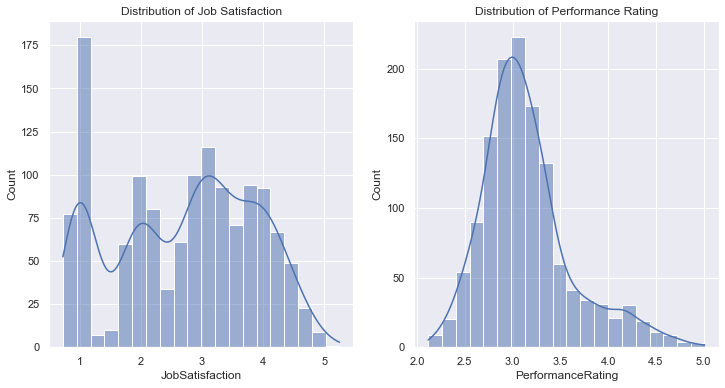

In [32]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

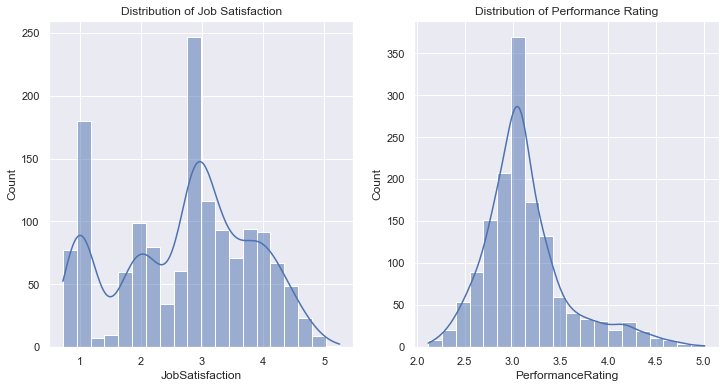

In [33]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df2['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df2['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

This approach of using the median to fill in the null values is usually a good strategy when we are working with a collection of data from a survey because this type of data set usually follows a normal distribution where most of the answers given are common to all participants.
However, although this is true when analysing the performance ratings of all employees in the company, it is not the same when analysing the distribution of responses about job satisfaction, where there seems to be a wider and more dispersed opinion.

As we can see, using the median to fill in the null values is effective when working with data that follow a normal distribution, but since the purpose of the project is to study how to increase performance rating but also how to increase job satisfaction without affecting the scattered nature of this second is quite important and so it was decided to proceed with a more advanced way of filling in the null values.

> 1.3.6 Handling missing values in numerical features (II)

To maintain the original spread and distribution of the data, we are considering using a more sophisticated imputation method that takes into account the data's variability. One such method is Multiple Imputation.

Multiple Imputation is a statistical technique that fills in missing values multiple times to create several complete datasets. The final imputation is obtained by averaging these datasets. This method is beneficial because it preserves the natural variance in the data.

In [34]:
df3 = df.copy()
df_cat_columns = df3[categorical_columns].fillna('Missing')
categorical_columns = df_cat_columns.select_dtypes(include=['object']).columns
df3 = pd.get_dummies(df3, columns=categorical_columns)

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1323 non-null   float64
 1   DailyRate                          1323 non-null   float64
 2   DistanceFromHome                   1323 non-null   float64
 3   Education                          1323 non-null   float64
 4   EmployeeCount                      1323 non-null   float64
 5   EmployeeNumber                     1323 non-null   float64
 6   EnvironmentSatisfaction            1323 non-null   float64
 7   HourlyRate                         1323 non-null   float64
 8   JobInvolvement                     1323 non-null   float64
 9   JobLevel                           1323 non-null   float64
 10  JobSatisfaction                    1323 non-null   float64
 11  MonthlyIncome                      1323 non-null   float

In [ ]:
> 1.3.6.1 Iterative imputation

In [36]:
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

# Selecting numerical columns from df3
numerical_columns = df3.select_dtypes(include=['float64']).columns

# Applying the imputer to the numerical columns in df3
df3[numerical_columns] = iterative_imputer.fit_transform(df3[numerical_columns])

The Early Stopping Criterion is used by the imputer to check if it has reached convergence before the maximum number of iterations (max_iter). If the change in imputed values between iterations is below a certain threshold, the imputer stops iterating and considers it has converged.

 The warning message indicates that the imputer did not reach this convergence criterion within the specified number of iterations (10 in this case). Essentially, the imputed values were still changing significantly at iteration 10.

In [37]:
iterative_imputer = IterativeImputer(max_iter=20, random_state=0)

# Selecting numerical columns from df3
numerical_columns = df3.select_dtypes(include=['float64']).columns

# Applying the imputer to the numerical columns in df3
df3[numerical_columns] = iterative_imputer.fit_transform(df3[numerical_columns])

> 1.3.7 Dataset before (df) and after (df2) modifications comparation - Numerical features (II)

- Statistical comparison

Dataset before applying handling null values

In [38]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,...,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,...,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,...,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,...,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,...,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,...,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


Dataset after applying handling null values

In [39]:
df3.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.744760,802.048424,9.093932,2.925733,0.999297,1026.681849,2.726172,65.652395,2.742739,2.058750,...,0.054422,0.174830,0.191156,0.051020,0.202721,0.405442,0.291837,0.900000,0.631973,0.268027
std,9.601916,392.790412,7.758481,1.019300,0.094578,579.135856,1.071830,20.367763,0.726376,1.115443,...,0.226925,0.379951,0.393346,0.220114,0.402163,0.491144,0.454762,0.300102,0.482433,0.443083
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.219032,502.681603,2.265377,2.200839,0.938491,539.350448,1.956071,49.027545,2.260665,1.058998,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,35.146708,800.000181,7.871631,2.986715,0.998640,1026.664408,2.786977,65.518711,2.797043,1.922125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,42.409896,1101.063049,11.525354,3.598201,1.059647,1469.776833,3.501999,81.466110,3.139241,2.608536,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Multiple Imputation is a statistical technique that preserves the descriptive characteristics of values with minimal variation in feature values.

- Visual inspection

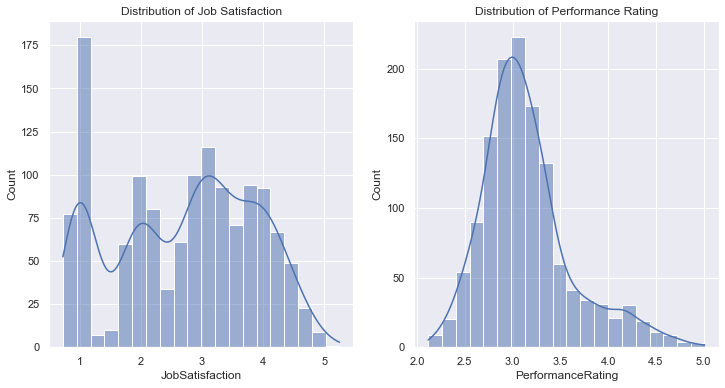

In [40]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

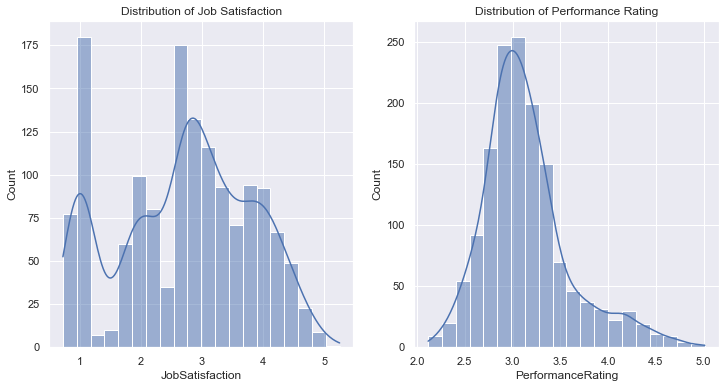

In [41]:
plt.figure(figsize=(12, 6))

# Plotting for JobSatisfaction
plt.subplot(1, 2, 1)
sns.histplot(df3['JobSatisfaction'], kde=True, bins=20)
plt.title('Distribution of Job Satisfaction')

# Plotting for PerformanceRating
plt.subplot(1, 2, 2)
sns.histplot(df3['PerformanceRating'], kde=True, bins=20)
plt.title('Distribution of Performance Rating')

plt.show()

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EmployeeCount                      1470 non-null   float64
 5   EmployeeNumber                     1470 non-null   float64
 6   EnvironmentSatisfaction            1470 non-null   float64
 7   HourlyRate                         1470 non-null   float64
 8   JobInvolvement                     1470 non-null   float64
 9   JobLevel                           1470 non-null   float64
 10  JobSatisfaction                    1470 non-null   float64
 11  MonthlyIncome                      1470 non-null   float

As can be seen, using Multiple Imputation as a statistical technique to fill null values maintains the distribution and spread of the data. 
Therefore, we have decided to move forward with this technique for the numerical features and null values in our dataset combinded with labelling the null values for the categorical features previoulsly done.

In [46]:
df3

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41.920786,990.110009,1.016716,1.770313,1.033298,1.054148,2.146294,93.827486,3.426960,2.464492,...,0,0,1,0,0,0,1,1,0,1
1,51.589037,276.776030,9.019743,1.035333,0.944859,2.107031,3.470803,52.304157,1.813458,1.788697,...,0,1,0,0,0,1,0,1,1,0
2,33.131540,1204.158501,2.198662,2.118801,0.810809,4.008125,3.979420,87.271332,1.877226,0.833488,...,0,0,0,0,0,0,1,1,0,1
3,34.707073,1352.752432,2.937851,3.670674,0.822976,4.587269,3.734705,56.378982,2.932646,1.095372,...,0,1,0,0,0,1,0,0,0,1
4,24.790188,485.053333,1.988953,1.120496,0.981686,7.228740,1.079412,40.433887,3.117739,0.937746,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,37.421699,914.061807,21.647903,3.021161,0.950166,2142.083554,3.171444,65.561455,3.372679,1.993840,...,0,0,0,0,0,1,0,1,1,0
1466,34.957777,574.675152,6.027683,1.122961,1.064563,2221.578902,4.284094,39.842324,2.038727,2.532482,...,0,0,0,0,0,1,0,1,1,0
1467,26.884296,151.506083,9.107445,3.478895,0.960908,1026.749976,2.152282,91.603642,4.394863,1.964613,...,0,0,0,0,0,1,0,1,0,1
1468,39.448386,995.977086,2.094496,2.956093,0.873312,2086.654641,4.095580,59.110216,2.019760,1.925025,...,0,0,1,0,0,1,0,0,1,0


References

Shukla, P. (2022). Handling Missing Data with SimpleImputer. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/.

scikit-learn. (n.d.). 6.4. Imputation of missing values. [online] Available at: https://scikit-learn.org/stable/modules/impute.html#:~:text=The%20SimpleImputer%20class%20provides%20basic [Accessed 28 Dec. 2023].

Stack Overflow. (n.d.). Pandas not recognizing NaN as null. [online] Available at: https://stackoverflow.com/questions/30604893/pandas-not-recognizing-nan-as-null [Accessed 28 Dec. 2023].

pandas.pydata.org. (n.d.). pandas.isnull — pandas 1.4.2 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.isnull.html.

note.nkmk.me. (2023). pandas: Find rows/columns with NaN (missing values) | note.nkmk.me. [online] Available at: https://note.nkmk.me/en/python-pandas-nan-extract/ [Accessed 28 Dec. 2023].

saturncloud.io. (2023). How to Check if a Single Cell Value is NaN in Pandas | Saturn Cloud Blog. [online] Available at: https://saturncloud.io/blog/how-to-check-if-a-single-cell-value-is-nan-in-pandas/#:~:text=One%20of%20the%20most%20common [Accessed 28 Dec. 2023].

Vanawat, N. (2021). How To Perform Exploratory Data Analysis -A Guide for Beginners. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/.
    

Stack Overflow. (n.d.). ConvergenceWarning: Liblinear failed to converge, increase the number of iterations. [online] Available at: https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati [Accessed 29 Dec. 2023].

Li, P., Stuart, E.A. and Allison, D.B. (2015). Multiple Imputation. JAMA, 314(18), p.1966. doi:https://doi.org/10.1001/jama.2015.15281.

scikit-learn.org. (n.d.). 6.4. Imputation of missing values — scikit-learn 0.22.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/impute.html.